<h1> GeoDirtyAnalysis v 0.0.1</h1>
Programa que realiza análises estatísticas e visualização para dados georreferenciados. Permite ao usuário obter *insigths* iniciais sobre alguma área de estudo
Por: Heitor Nóbrega Tico;

https://github.com/HeitorNT

<h1>SEDIMENTO DE CORRENTE</h1>

#Importações, troca de diretório e carregamento de banco

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My Drive/prosp_geoq

/content/gdrive/My Drive/prosp_geoq


In [0]:
import perso
import pandas as pd
import matplotlib.pyplot as plt
import stat
import numpy as np
import altair as alt
!pip install geostatspy
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
!pip install pyproj
import pyproj
import scipy
from sklearn.preprocessing import scale
!pip install plotly==4.3.0
import plotly.express as px

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 10.1MB 35kB/s 
     |████████████████████████████████| 7.3MB 2.8MB/s 
  Found existing installation: plotly 4.1.1
    Uninstalling plotly-4.1.1:
      Successfully uninstalled plotly-4.1.1


In [0]:
sed_cor = pd.read_excel('Lavras do Sul.xlsx', sheet_name= 1)

Ajusta display de linhas

In [0]:
pd.options.display.max_rows =1000

#Análise exploratória

Visualização preliminar

In [0]:
sed_cor.head()

,OBJECTID,id_amostra,amostra,numero_campo,base_cartografica,id_classe_amostra,classe_amostra,tipo_amostra,material_coletado,fonte_amostra,situacao_amostra,grau_intemperismo,mineral_minerio,tipo_vegetacao,area_drenagem,tipo_solo,pluviosidade,horizonte_solo,profundidade_rio,projeto,metodo,abertura,unidade,precisao,consistencia,data,ag,al,bi,b,ca,cd,ce,co,cr,cs,fe,ga,ge,hf,hg,indio,k,la,mg,mn,mo,na,nb,ni,pb,p,rb,re,sc,se,sr,s,ta,te,th,ti,y,zn,arsenio,au,ba,be,cu,sn,w,li,v,u,DATUM,POINT_X,POINT_Y
0,299207,279470,JBQ621,JZ0118,SH-22-Y-A-IV-2,10,Sedimento de corrente,Composto,AluviÃ£o,Afloramento,Leito ativo abaixo do nível d'agua,NaN,NaN,NaN,Até 10 Km2,NaN,NaN,NaN,0,Ouro RS/SC,Espectroscopia de absorção atômica,Fusão/Copelação,ppm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,16",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIRGAS 2000,-53.591944,-30.726667
1,299678,279495,JBQ646,JZ0143,SH-22-Y-A-IV-2,10,Sedimento de corrente,Composto,AluviÃ£o,Afloramento,Leito ativo abaixo do nível d'agua,NaN,NaN,NaN,Até 10 Km2,NaN,NaN,NaN,0,Ouro RS/SC,Espectroscopia de absorção atômica,Fusão/Copelação,ppm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,035",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIRGAS 2000,-53.574167,-30.745833
2,300064,254379,JAG387,JS0069,SH-22-Y-A-IV-1,10,Sedimento de corrente,Composto,AluviÃ£o,Afloramento,Leito ativo abaixo do nível d'agua,NaN,NaN,Terras cultivadas,Até 10 Km2,NaN,Chuvas esparsas,NaN,1,Cobre nos corpos básicos - ultrabásicos e efus...,Espectroscopia de absorção atômica,HNO3 a quente,ppm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interferência,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"70,00",NaN,NaN,NaN,NaN,"9,00",NaN,NaN,NaN,NaN,NaN,SIRGAS 2000,-53.976944,-30.518333
3,300065,254379,JAG387,JS0069,SH-22-Y-A-IV-1,10,Sedimento de corrente,Composto,AluviÃ£o,Afloramento,Leito ativo abaixo do nível d'agua,NaN,NaN,Terras cultivadas,Até 10 Km2,NaN,Chuvas esparsas,NaN,1,Cobre nos corpos básicos - ultrabásicos e efus...,Espectrometria Ótica de emissão,Semiquantitativa,ppm,0,NaN,NaN,Não detectado,NaN,Não detectado,"30,00",NaN,Não detectado,NaN,"10,00","50,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"100,00",NaN,"700,00",Não detectado,NaN,"15,00","15,00","30,00",NaN,NaN,NaN,"10,00",NaN,"200,00",NaN,NaN,NaN,NaN,NaN,"50,00","<200,00",Não detectado,Não detectado,"700,00","1,00","10,00",Não detectado,Não detectado,NaN,"70,00",NaN,SIRGAS 2000,-53.976944,-30.518333
4,300066,254379,JAG387,JS0069,SH-22-Y-A-IV-1,10,Sedimento de corrente,Composto,AluviÃ£o,Afloramento,Leito ativo abaixo do nível d'agua,NaN,NaN,Terras cultivadas,Até 10 Km2,NaN,Chuvas esparsas,NaN,1,Cobre nos corpos básicos - ultrabásicos e efus...,Espectrometria Ótica de emissão,Semiquantitativa,%,0,NaN,NaN,NaN,NaN,NaN,NaN,"0,30",NaN,NaN,NaN,NaN,NaN,"5,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,70",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIRGAS 2000,-53.976944,-30.518333


Verifica tipos de dados

In [0]:
sed_cor.dtypes

OBJECTID               int64
id_amostra             int64
amostra               object
numero_campo          object
base_cartografica     object
id_classe_amostra      int64
classe_amostra        object
tipo_amostra          object
material_coletado     object
fonte_amostra         object
situacao_amostra      object
grau_intemperismo    float64
mineral_minerio      float64
tipo_vegetacao        object
area_drenagem         object
tipo_solo            float64
pluviosidade          object
horizonte_solo       float64
profundidade_rio       int64
projeto               object
metodo                object
abertura              object
unidade               object
precisao               int64
consistencia         float64
data                 float64
ag                    object
al                    object
bi                    object
b                     object
ca                    object
cd                    object
ce                    object
co                    object
cr            

Remove caracteres especiais

In [0]:
sed_cor = sed_cor.replace(['Não detectado', np.nan])
sed_cor = sed_cor.replace(',', '.', regex=True)
sed_cor = sed_cor.replace('<', '', regex=True)
sed_cor = sed_cor.replace('>', '', regex=True)
sed_cor = sed_cor.replace(['Interferência', np.nan])

Converte tipos de dados

In [0]:
sed_cor.loc[:, 'ag':'DATUM'] = sed_cor.loc[:, 'ag':'u'].astype(float)

In [0]:
#sed_cor.dtypes

Pegando somente colunas necessárias

In [0]:
l = sed_cor.columns.to_list()
print(l)

['OBJECTID', 'id_amostra', 'amostra', 'numero_campo', 'base_cartografica', 'id_classe_amostra', 'classe_amostra', 'tipo_amostra', 'material_coletado', 'fonte_amostra', 'situacao_amostra', 'grau_intemperismo', 'mineral_minerio', 'tipo_vegetacao', 'area_drenagem', 'tipo_solo', 'pluviosidade', 'horizonte_solo', 'profundidade_rio', 'projeto', 'metodo', 'abertura', 'unidade', 'precisao', 'consistencia', 'data', 'ag', 'al', 'bi', 'b', 'ca', 'cd', 'ce', 'co', 'cr', 'cs', 'fe', 'ga', 'ge', 'hf', 'hg', 'indio', 'k', 'la', 'mg', 'mn', 'mo', 'na', 'nb', 'ni', 'pb', 'p', 'rb', 're', 'sc', 'se', 'sr', 's', 'ta', 'te', 'th', 'ti', 'y', 'zn', 'arsenio', 'au', 'ba', 'be', 'cu', 'sn', 'w', 'li', 'v', 'u', 'DATUM', 'POINT_X', 'POINT_Y']


In [0]:
col_uteis = ['amostra','POINT_X', 'POINT_Y', 'ag', 'al', 'bi', 'b', 'ca', 'cd', 'ce', 'co', 'cr', 'cs', 'fe', 'ga', 'ge', 'hf', 'hg', 'indio', 'k', 'la', 'mg', 'mn', 'mo', 'na', 'nb', 'ni', 'pb', 'p', 'rb', 're', 'sc', 'se', 'sr', 's', 'ta', 'te', 'th', 'ti', 'y', 'zn', 'arsenio', 'au', 'ba', 'be', 'cu', 'sn', 'w', 'li', 'v', 'u' ]

In [0]:
variaveis = col_uteis[3:]

In [0]:
bd = sed_cor[col_uteis]

Verifica todas as unidades de medidas presentes no banco

In [0]:
perso.montSet(sed_cor['unidade'])

{'%', 'ppb', 'ppm'}

Verifica se todas as variaveis possuem mais de uma unidade de medida

In [0]:
var = []
unil = []
for v in col_uteis[3:]:
  fati = sed_cor.loc[:, ['unidade', v]]
  uni = perso.montSet(sed_cor.unidade)
  var.append(v)
  unil.append(uni)
dfuni = pd.DataFrame(var)
dfuni['uni'] = unil
#dfuni

*Todas as variáveis possuem 3 unidades de medidas diferentes*

Obtendo nova escala:

In [0]:
bd[variaveis] = scale(bd[variaveis])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:189: UserWarning:

Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Converte coordenadas

In [0]:
source = pyproj.Proj(proj='latlong', datum='WGS84')
target = pyproj.Proj(proj='utm', zone=22, datum='WGS84')
point_x = bd.POINT_X.to_list()
point_y = bd.POINT_Y.to_list()
x, y = pyproj.transform(source, target, point_x, point_y)
bd['POINT_X'] = x
bd['POINT_Y'] = y 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Univariada

Sumário estatístico

In [0]:
suma = perso.sumaEst(bd)

In [0]:
suma

,POINT_X,POINT_Y,ag,al,bi,b,ca,cd,ce,co,cr,cs,fe,ga,ge,hf,hg,indio,k,la,mg,mn,mo,na,nb,ni,pb,p,rb,re,sc,se,sr,s,ta,te,th,ti,y,zn,arsenio,au,ba,be,cu,sn,w,li,v,u
contagem,421.000,421.000,319.000,321.000,316.000,418.000,417.000,316.000,316.000,418.000,418.000,316.000,417.000,316.000,316.000,316.000,319.000,319.000,321.000,418.000,417.000,418.000,316.000,321.000,418.000,418.000,418.000,321.000,316.000,319.000,418.000,316.000,418.000,320.000,316.000,316.000,316.000,417.000,418.000,419.000,316.000,421.000,418.000,418.000,419.000,415.000,313.000,316.000,418.000,316.000
média,236758.562,-3403986.457,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
variância,174994001.877,277767220.856,1.003,1.003,1.003,1.002,1.002,1.003,1.003,1.002,1.002,1.003,1.002,1.003,0.000,1.003,1.003,1.003,1.003,1.002,1.002,1.002,1.003,1.003,1.002,1.002,1.002,1.003,1.003,0.000,1.002,1.003,1.002,1.003,0.000,1.003,1.003,1.002,1.002,1.002,1.003,1.002,1.002,1.002,1.002,1.002,1.003,1.003,1.002,1.003
desvio padrão,13228.530,16666.350,1.002,1.002,1.002,1.001,1.001,1.002,1.002,1.001,1.001,1.002,1.001,1.002,0.000,1.002,1.002,1.002,1.002,1.001,1.001,1.001,1.002,1.002,1.001,1.001,1.001,1.002,1.002,0.000,1.001,1.002,1.001,1.002,0.000,1.002,1.002,1.001,1.001,1.001,1.002,1.001,1.001,1.001,1.001,1.001,1.002,1.002,1.001,1.002
coeficiente de variação,0.056,-0.005,19185405186844084.000,15738179946846406.000,475131546885842944.000,-982157630243339.750,-4366344040725440.500,13198098524606716.000,-43193776989622136.000,-14278488579067944.000,-538502997839132672.000,-3085269784973000.500,-2678428636093149.000,2308331401874535.000,nan,-4864828125111032.000,12904981067383894.000,-18213992265991184.000,12218671351138110.000,-12481857565807766.000,3030228690632378.500,221736528521996032.000,-5735994529808954.000,1553554243680109.000,-3054717167644993.500,-5576214474665581.000,-12004843900872384.000,21610635150893520.000,-1425394640657527296.000,nan,-15972546546076002.000,-5747559034909410.000,-4142330752608717.500,-6729179356688294.000,nan,8880963493193307.000,-2945030249292408.000,-7705970912038484.000,-16828218682472904.000,-4409017695176351.000,4983897344956378.000,41720247525571824.000,-1192886387618332.500,-41883566498599224.000,6768523358291333.000,9645617128243108.000,-1872835540736730.000,-14770928918730852.000,-2790170973259754.500,-59391443360730352.000
mínimo,213527.380,-3433272.938,-0.387,-1.791,-0.216,-0.885,-1.127,-1.346,-1.441,-0.735,-0.802,-1.335,-1.332,-1.969,0.000,-0.955,-0.455,-0.791,-1.658,-1.307,-1.211,-0.957,-0.499,-0.380,-0.966,-1.119,-0.995,-1.555,-1.773,0.000,-1.261,-1.896,-0.924,-1.122,0.000,-0.463,-1.049,-0.902,-1.216,-1.140,-1.000,-0.300,-1.208,-1.061,-0.383,-0.992,-0.200,-1.493,-1.631,-1.372
q1,227587.687,-3415300.438,-0.318,-0.802,-0.199,-0.885,-0.632,-0.890,-0.546,-0.543,-0.675,-0.709,-0.821,-0.748,0.000,-0.676,-0.349,-0.791,-0.784,-0.630,-0.961,-0.549,-0.295,-0.380,-0.864,-0.894,-0.533,-1.111,-0.805,0.000,-0.813,-0.793,-0.692,-1.122,0.000,-0.463,-0.743,-0.880,-0.787,-0.646,-0.656,-0.300,-0.810,-0.830,-0.275,-0.853,-0.200,-0.586,-0.996,-0.575
q2,234376.473,-3407879.545,-0.284,-0.127,-0.185,-0.550,-0.137,0.022,-0.128,-0.199,-0.346,-0.278,-0.302,0.157,0.000,-0.397,-0.260,0.059,-0.201,-0.121,-0.087,-0.305,-0.167,-0.380,-0.664,-0.213,-0.205,-0.225,-0.063,0.000,-0.249,-0.241,-0.413,-0.380,0.000,-0.463,-0.285,-0.792,-0.274,-0.376,-0.234,-0.299,-0.533,-0.343,-0.197,-0.666,-0.200,-0.359,0.191,0.037
q3,248865.454,-3384332.308,-0.115,0.674,-0.128,0.621,0.510,0.478,0.169,0.016,0.508,0.398,1.183,0.564,0.000,0.301,-0.078,0.059,0.674,0.203,0.412,0.038,0.021,-0.380,0.921,1.088,0.229,0.661,0.744,0.000,0.928,0.311,0.464,0.361,0.000,0.252,0.555,1.277,0.912,0.002,0.308,-0.288,0.928,0.170,-0.103,1.197,-0.128,0.70

Histogramas

In [0]:
sc = bd.loc[:,'ag':]

In [0]:
sc = sc.melt(var_name="variable", value_name="value")

In [0]:
#px.histogram(sc, x = 'value', y = 'variable', nbins=20, facet_col='variable') #não funciona

#Bivariada

In [0]:
oposto = variaveis[:]

In [0]:
oposto.reverse()

In [0]:
sc2 = bd[variaveis]

Scatter plots

In [0]:

source = sc2

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=variaveis,
    column=oposto
)

'\nsource = sc2\n\nalt.Chart(source).mark_circle().encode(\n    alt.X(alt.repeat("column"), type=\'quantitative\'),\n    alt.Y(alt.repeat("row"), type=\'quantitative\'),\n    color=\'Origin:N\'\n).properties(\n    width=150,\n    height=150\n).repeat(\n    row=variaveis,\n    column=oposto\n)'

Matrix de correlação

In [0]:
cor = sc2.corr()
cor

,ag,al,bi,b,ca,cd,ce,co,cr,cs,fe,ga,ge,hf,hg,indio,k,la,mg,mn,mo,na,nb,ni,pb,p,rb,re,sc,se,sr,s,ta,te,th,ti,y,zn,arsenio,au,ba,be,cu,sn,w,li,v,u
ag,1.000,0.127,0.339,-0.146,-0.045,0.169,0.207,-0.036,-0.125,0.068,-0.021,0.196,nan,0.045,0.841,0.546,0.200,0.203,-0.058,-0.029,0.212,-0.117,-0.128,-0.118,0.263,0.138,0.182,nan,-0.085,0.307,-0.061,-0.020,nan,0.297,0.065,-0.143,-0.028,-0.009,0.217,0.488,-0.074,0.171,0.315,-0.121,0.249,0.131,-0.029,0.172
al,0.127,1.000,0.114,-0.061,0.294,0.292,0.352,0.039,0.056,0.479,0.229,0.820,nan,0.593,0.200,0.193,0.727,0.217,0.310,0.110,-0.037,0.346,-0.057,0.140,0.157,0.552,0.651,nan,0.141,0.316,0.065,-0.230,nan,0.162,-0.375,0.062,-0.008,0.100,0.354,-0.114,0.151,0.163,0.146,-0.036,0.079,0.670,0.174,0.030
bi,0.339,0.114,1.000,-0.084,0.090,0.105,-0.003,0.001,-0.084,0.048,0.048,0.135,nan,0.060,0.289,0.380,0.181,-0.002,0.056,0.021,0.023,-0.076,-0.102,-0.087,0.467,0.157,0.038,nan,-0.048,0.376,0.002,0.029,nan,0.312,-0.088,-0.038,-0.098,0.040,0.443,0.058,0.021,-0.036,0.472,-0.104,0.420,0.209,0.056,-0.089
b,-0.146,-0.061,-0.084,1.000,0.294,0.114,-0.123,0.310,0.423,-0.069,0.536,0.007,nan,0.029,-0.085,0.014,-0.022,0.061,0.407,0.263,-0.095,0.024,0.798,0.384,0.138,-0.016,-0.052,nan,0.633,-0.247,0.510,-0.249,nan,-0.056,-0.148,0.659,0.645,0.582,-0.041,0.014,0.607,-0.227,-0.154,0.807,-0.097,0.054,0.694,-0.160
ca,-0.045,0.294,0.090,0.294,1.000,0.277,-0.043,0.376,0.665,0.210,0.616,0.242,nan,0.272,0.031,0.090,0.371,-0.051,0.695,0.378,-0.127,0.173,0.194,0.599,0.185,0.392,0.047,nan,0.663,-0.187,0.287,-0.230,nan,-0.019,-0.283,0.471,0.186,0.228,0.270,-0.071,0.377,-0.214,0.004,0.292,-0.058,0.360,0.522,-0.201
cd,0.169,0.292,0.105,0.114,0.277,1.000,0.638,0.345,0.082,0.428,0.236,0.501,nan,0.185,0.206,0.378,0.391,0.545,0.229,0.407,0.523,0.060,0.026,0.276,0.548,0.468,0.317,nan,0.161,0.271,0.076,-0.213,nan,0.549,-0.205,0.110,0.155,0.240,0.590,0.030,0.220,0.204,0.554,0.004,0.429,0.329,0.227,0.243
ce,0.207,0.352,-0.003,-0.123,-0.043,0.638,1.000,0.016,-0.100,0.339,-0.028,0.585,nan,0.131,0.273,0.305,0.271,0.858,-0.076,0.056,0.762,-0.050,-0.097,-0.051,0.346,0.174,0.562,nan,-0.106,0.607,-0.158,-0.051,nan,0.663,0.132,-0.120,0.187,0.110,0.415,0.001,-0.089,0.706,0.625,-0.039,0.553,0.238,-0.121,0.766
co,-0.036,0.039,0.001,0.310,0.376,0.345,0.016,1.000,0.453,-0.057,0.469,0.046,nan,0.022,0.067,0.059,0.071,-0.132,0.377,0.940,0.009,0.011,0.205,0.568,-0.028,0.213,0.012,nan,0.545,-0.030,0.251,-0.194,nan,-0.016,-0.186,0.309,0.146,0.191,0.009,0.022,0.432,-0.282,-0.022,0.102,-0.024,-0.012,0.530,-0.080
cr,-0.125,0.056,-0.084,0.423,0.665,0.082,-0.100,0.453,1.000,0.053,0.538,0.115,nan,0.215,-0.072,0.008,0.113,-0.104,0.637,0.409,-0.101,0.054,0.342,0.837,0.081,0.043,-0.035,nan,0.800,-0.293,0.464,-0.195,nan,-0.082,-0.191,0.492,0.319,0.346,0.056,0.005,0.575,-0.329,-0.070,0.489,-0.079,0.263,0.655,-0.140
cs,0.068,0.479,0.048,-0.069,0.210,0.428,0.339,-0.057,0.053,1.000,0.018,0.610,nan,0.271,0.107,0.198,0.624,0.418,0.139,-0.018,0.054,-0.005,-0.111,0.209,0.169,0.499,0.646,nan,-0.030,0.122,0.043,-0.147,nan,0.113,-0.261,-0.072,-0.069,0.049,0.548,-0.075,0.040,0.262,0.210,-0.067,0.102,0.730,0.097,0.125


Variaveis que possuem correlação maior que |0.60|

In [0]:
corr = cor[(cor >= 0.6) | (cor <= -0.6)] # Pega da matriz de correlação os valores desejados
s = corr.unstack()                       # Gira a matriz e faz nomes de colunas e linhas virarem index 
so = s.sort_values(kind="quicksort")     # Organiza das menores correalçaoes para as maiores
d = pd.DataFrame(so)                     # Novo df com valores organizados
d = d[d != 1]                            # Remove correlação igual a 1
d.dropna(inplace=True)                   # Remove valores nulos
d.reset_index(inplace=True)              # Cria um novo index, numérico
d = d.iloc[::2]                          # Pega somente um par com correlação
d.reset_index(inplace=True)              # Gera novo index
d.drop(['index'], axis=1, inplace=True)  # Exclui index antigo
d.columns = ['v1', 'v2', 'coef_pears']   # Renomeia colunas
d                                        # Mostra pares que tem correlação e o coef de correlação de pearson

,v1,v2,coef_pears
0,rb,k,0.603
1,ga,k,0.604
2,ba,b,0.607
3,ce,se,0.607
4,sc,ti,0.608
5,th,u,0.609
6,ga,cs,0.610
7,fe,ca,0.616
8,fe,sn,0.623
9,cs,k,0.624


*A regressão não será realizada devido a grande quantidade de dados para todas as variáveis*

#Distribuição pontual dos Teores

In [0]:
for c, v in enumerate (variaveis):
  sbd = bd.loc[:,['POINT_X', 'POINT_Y', v]].dropna()
  xmin = min(sbd['POINT_X']) - 10000 ; xmax = max(sbd['POINT_X']) + 10000
  ymin = min(sbd['POINT_Y']) - 10000 ; ymax = max(sbd['POINT_Y']) + 10000
  vmin = min(sbd[v]) ; vmax = max(sbd[v])
  cmap = plt.cm.plasma
  GSLIB.locmap(df=sbd, xcol='POINT_X', ycol='POINT_Y', vcol=v,
             xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, vmin=vmin, vmax=vmax,
             title=f'{v}_sed_cor', xlabel='E', ylabel='N', vlabel=v, cmap=cmap, fig_name=f'{v}_sed_cor')

Output hidden; open in https://colab.research.google.com to view.

#Distribuição pontual dos teores anômalos

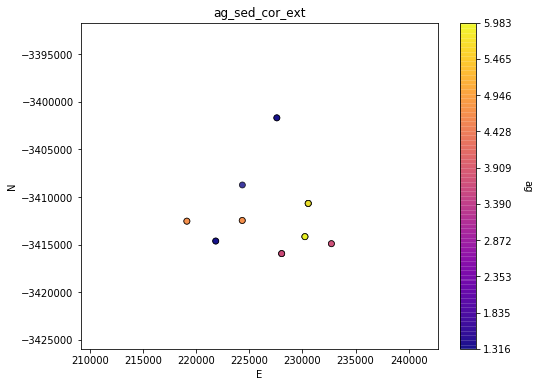

A variavel al não possui valores anômalos.


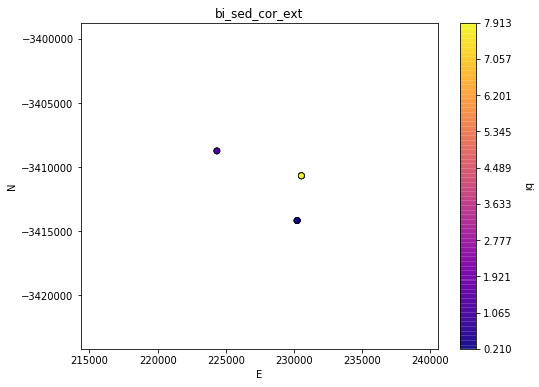

A variavel b não possui valores anômalos.


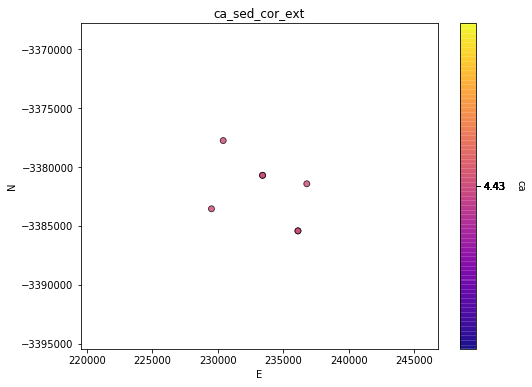

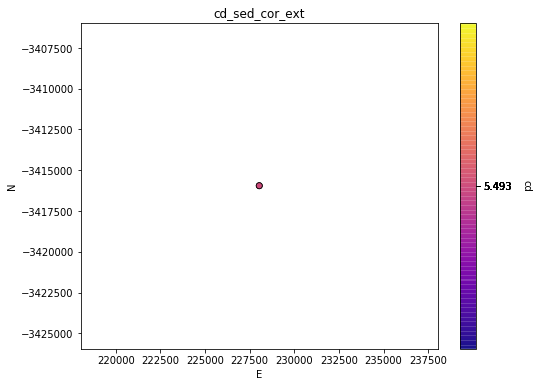

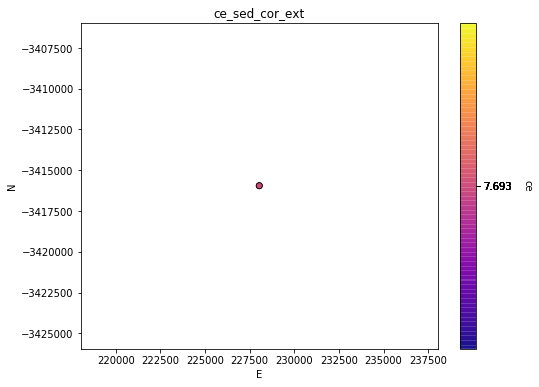

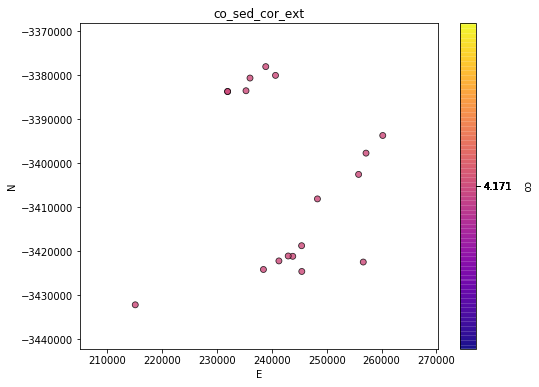

A variavel cr não possui valores anômalos.
A variavel cs não possui valores anômalos.
A variavel fe não possui valores anômalos.
A variavel ga não possui valores anômalos.


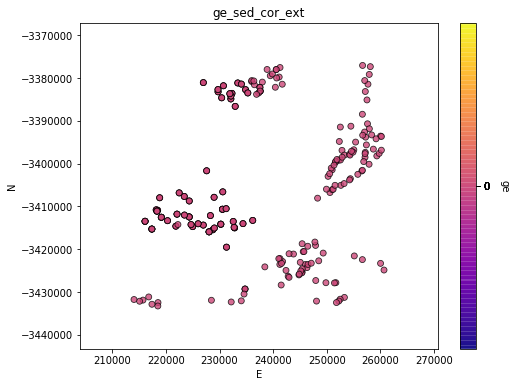

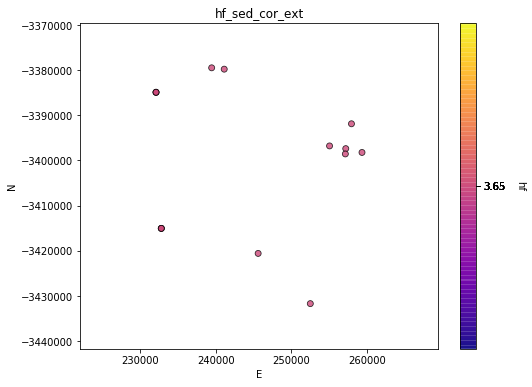

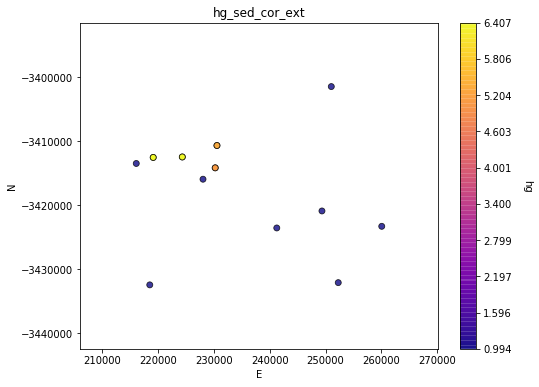

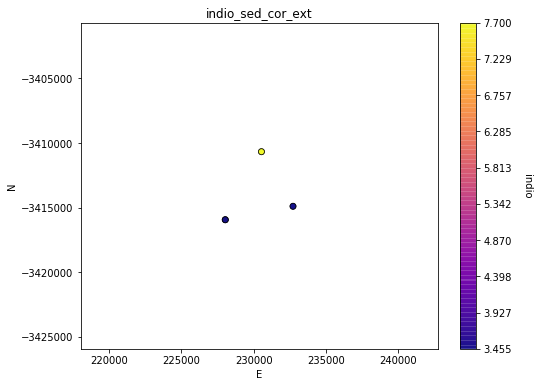

A variavel k não possui valores anômalos.


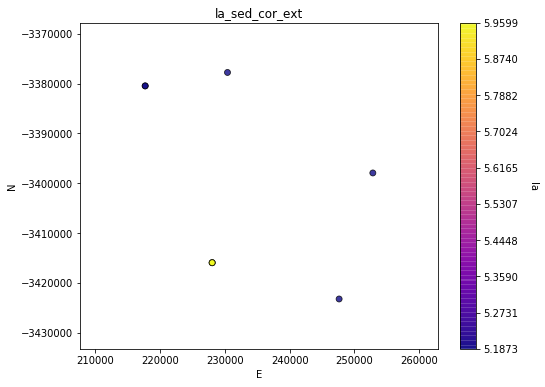

A variavel mg não possui valores anômalos.


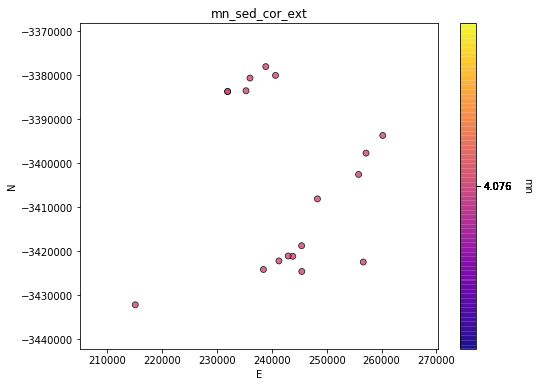

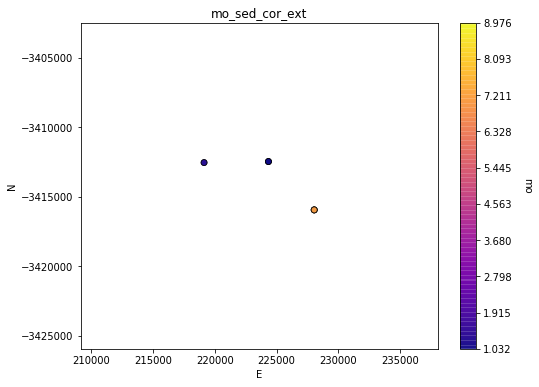

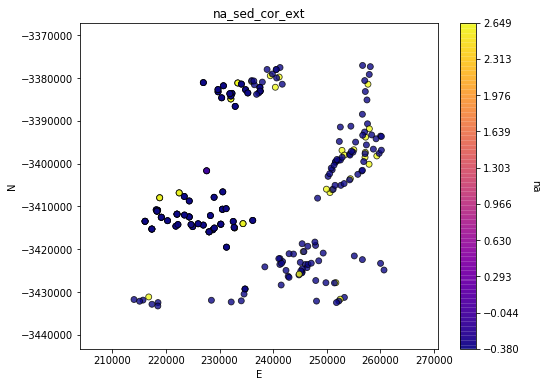

A variavel nb não possui valores anômalos.
A variavel ni não possui valores anômalos.


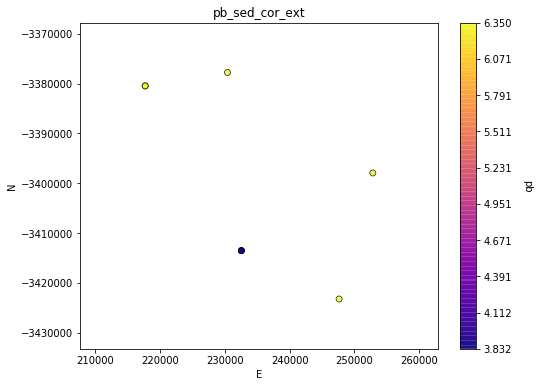

A variavel p não possui valores anômalos.
A variavel rb não possui valores anômalos.


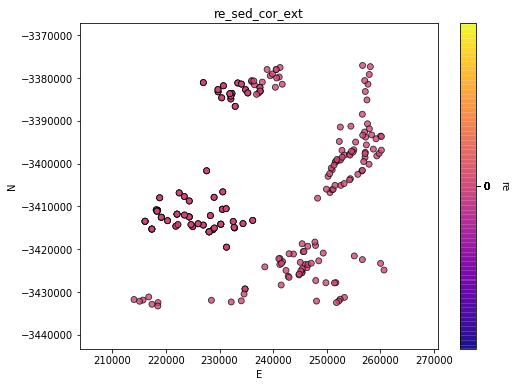

A variavel sc não possui valores anômalos.


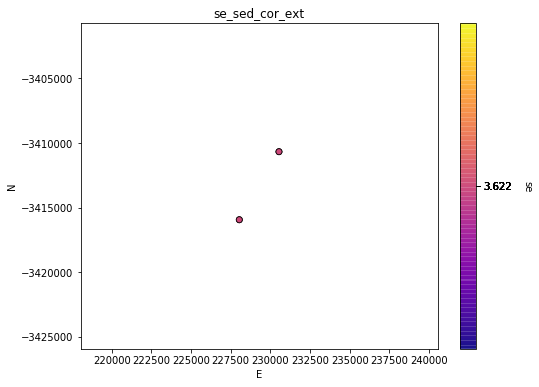

A variavel sr não possui valores anômalos.
A variavel s não possui valores anômalos.


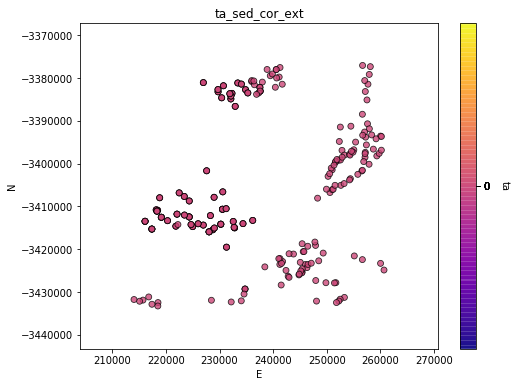

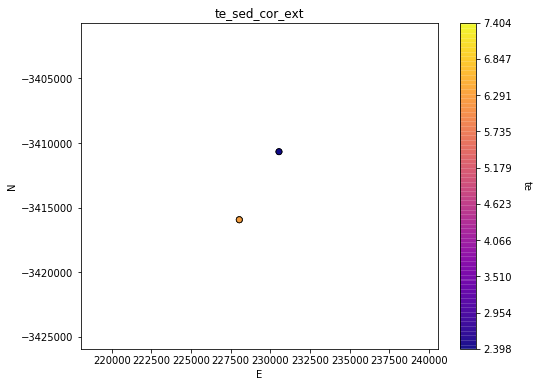

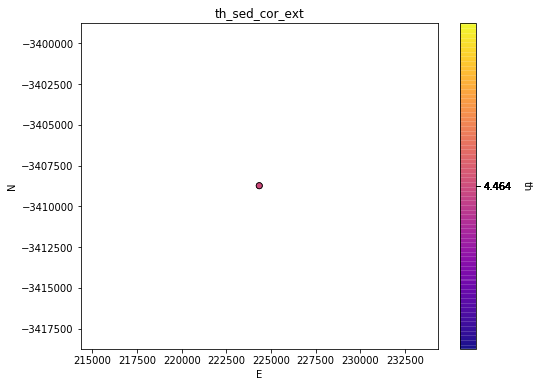

A variavel ti não possui valores anômalos.
A variavel y não possui valores anômalos.


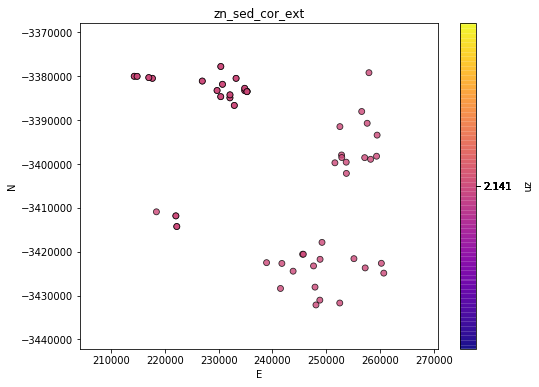

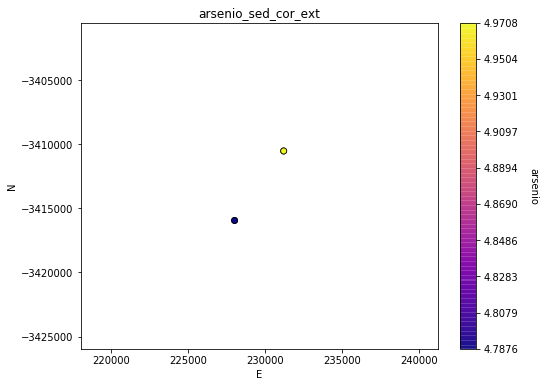

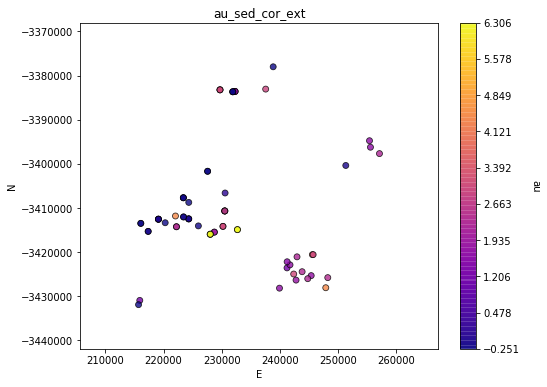

A variavel ba não possui valores anômalos.


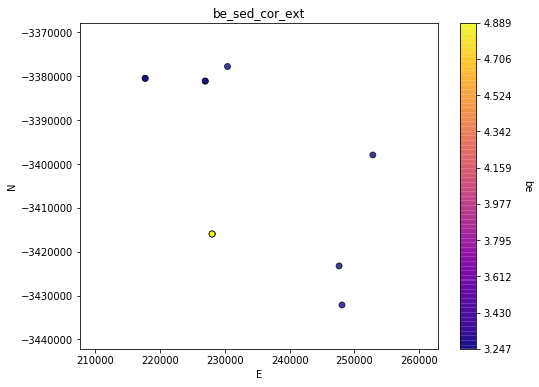

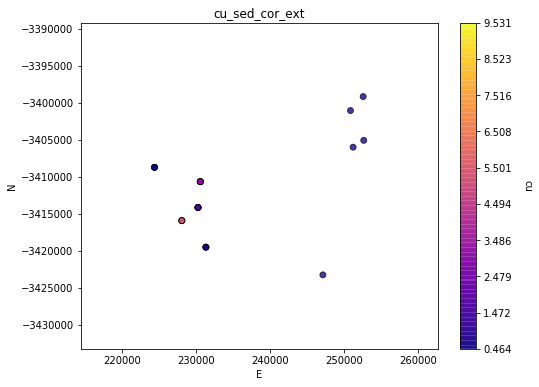

A variavel sn não possui valores anômalos.


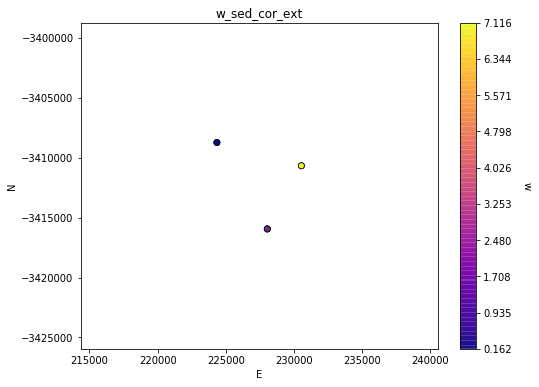

A variavel li não possui valores anômalos.
A variavel v não possui valores anômalos.


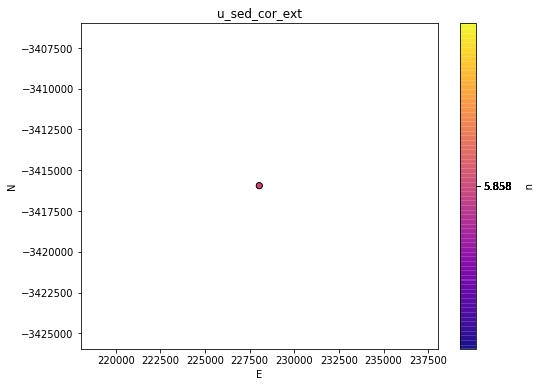

In [0]:
for c, v in enumerate (variaveis):
  sbd = bd.loc[:,['POINT_X', 'POINT_Y', v]].dropna()
  ext = sbd[(sbd[v] >= suma.loc['início extremos superiores',v])
   | (sbd[v] <= suma.loc['início extremos inferiores',v])]
  if len(ext['POINT_X']) != 0:
    xmin = min(ext['POINT_X']) - 10000 ; xmax = max(ext['POINT_X']) + 10000
    ymin = min(ext['POINT_Y']) - 10000 ; ymax = max(ext['POINT_Y']) + 10000
    vmin = min(ext[v]) ; vmax = max(ext[v])
    cmap = plt.cm.plasma
    GSLIB.locmap(df=ext, xcol='POINT_X', ycol='POINT_Y', vcol=v,
              xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, vmin=vmin, vmax=vmax,
              title=f'{v}_sed_cor_ext', xlabel='E', ylabel='N', vlabel=v, cmap=cmap, fig_name=f'{v}_sed_cor_ext')
  else:
    print(f'A variavel {v} não possui valores anômalos.')


#Distribuição espacial das variáveis

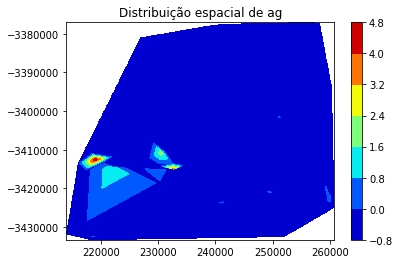

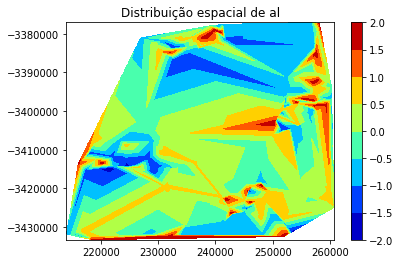

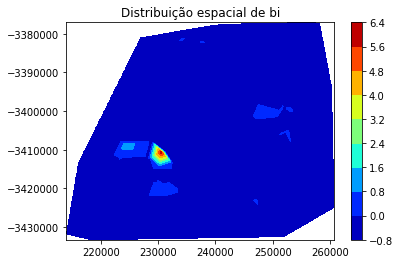

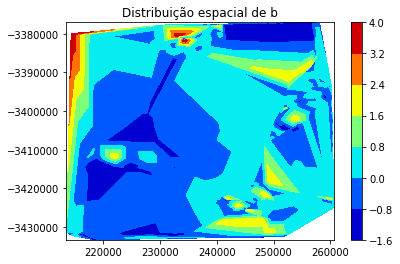

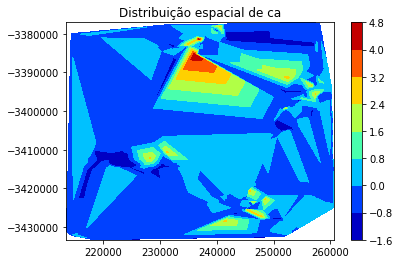

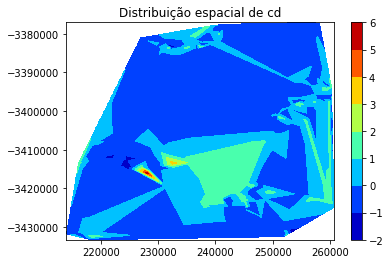

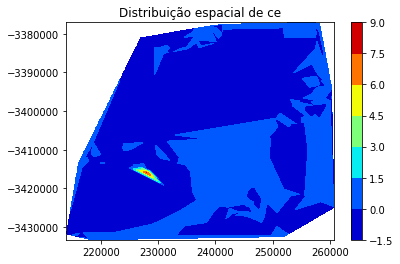

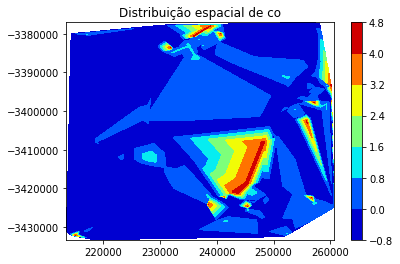

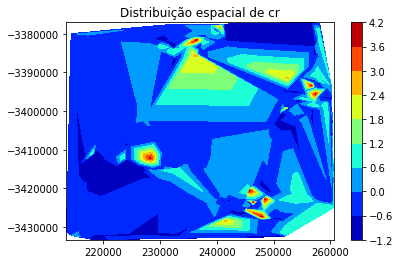

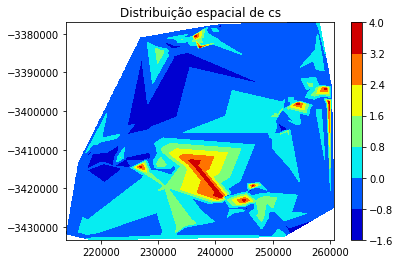

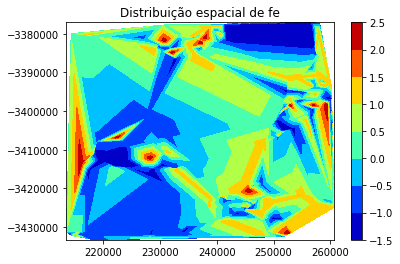

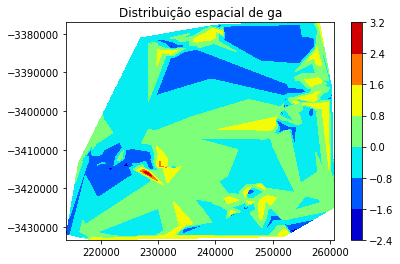

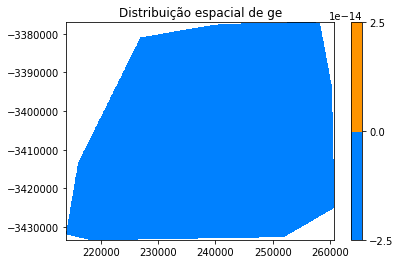

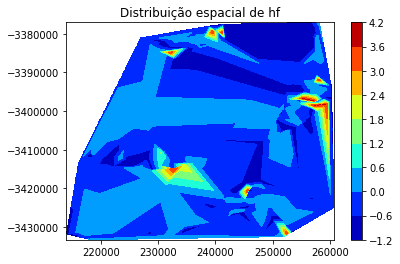

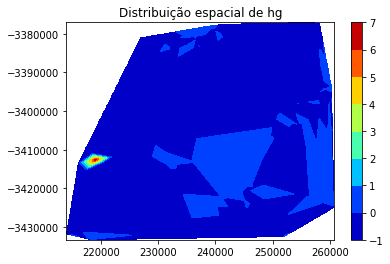

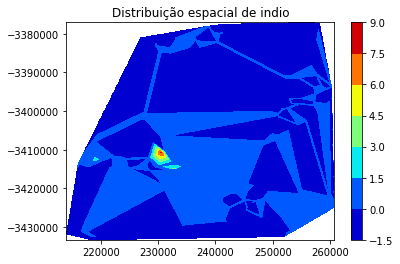

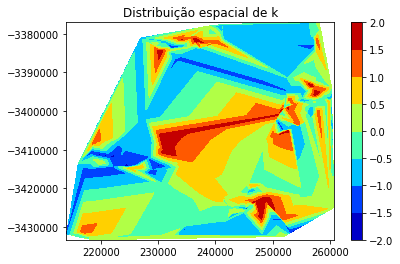

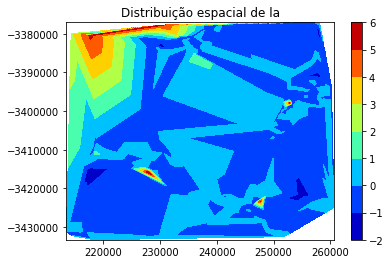

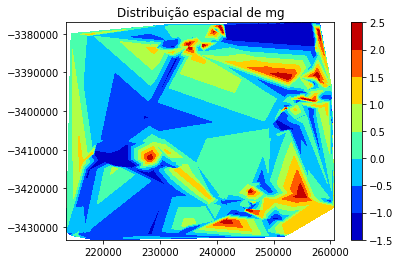

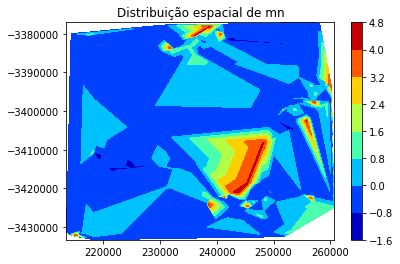

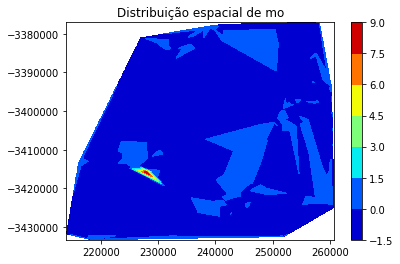

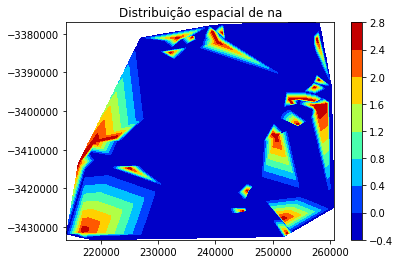

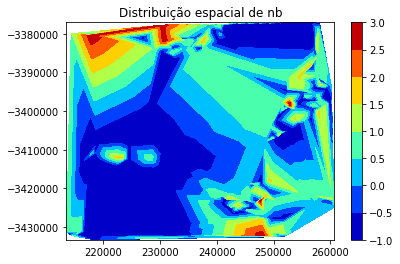

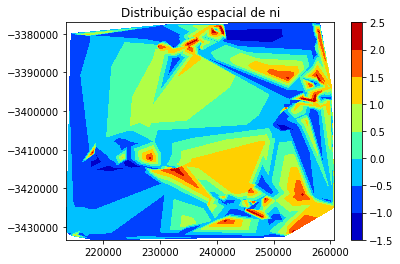

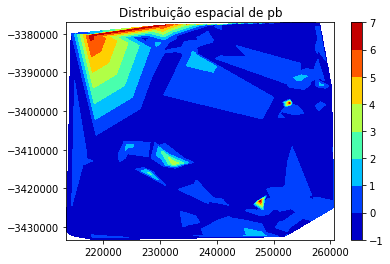

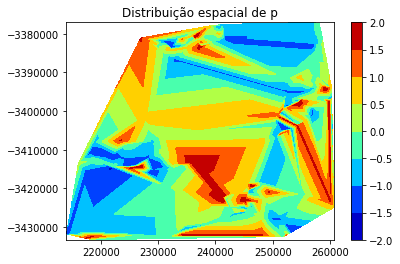

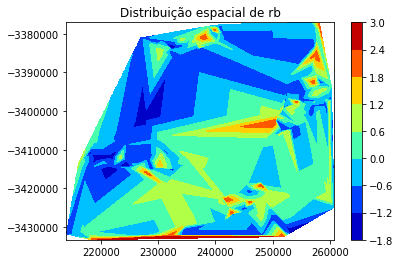

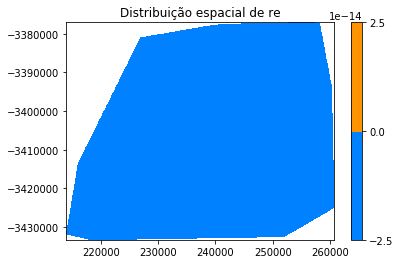

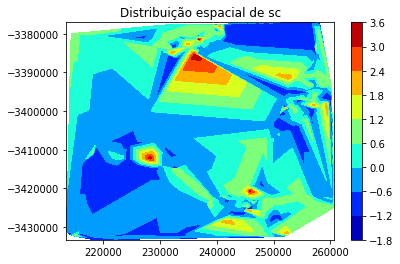

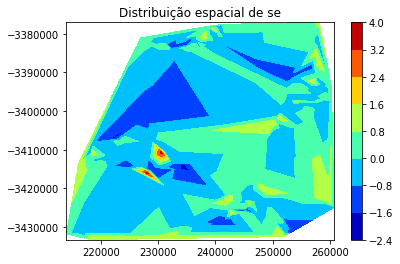

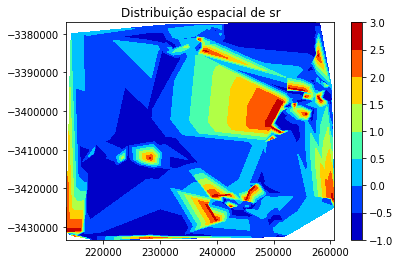

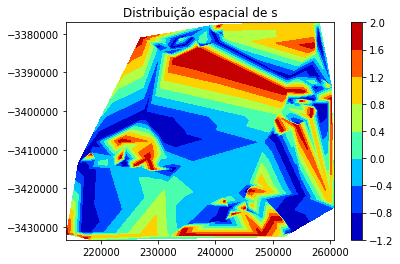

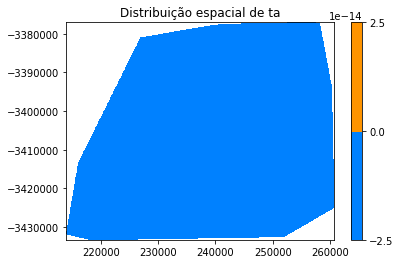

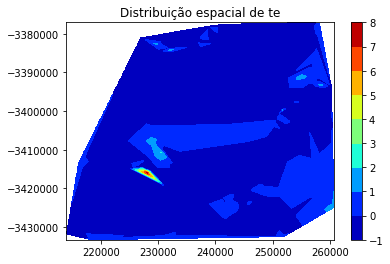

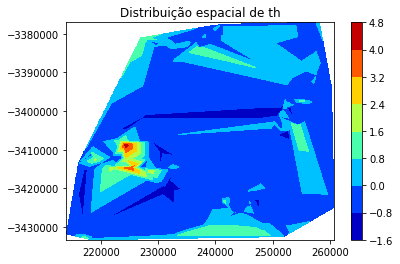

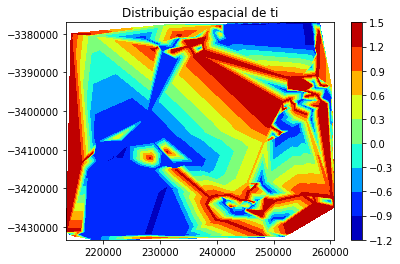

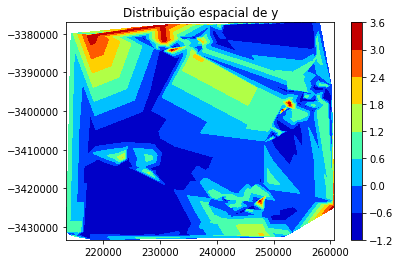

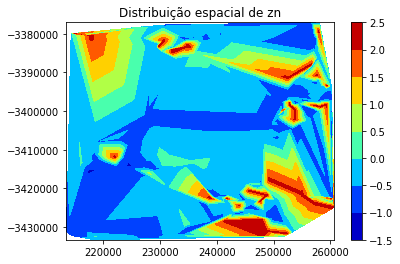

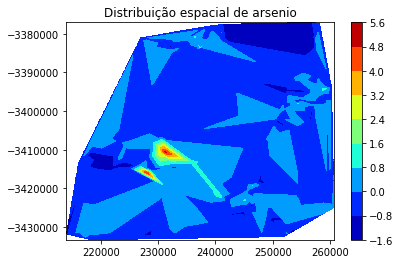

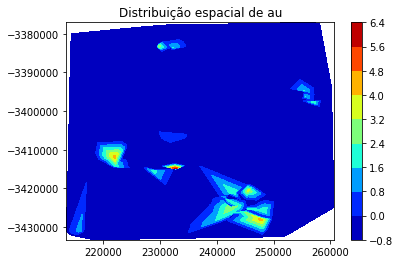

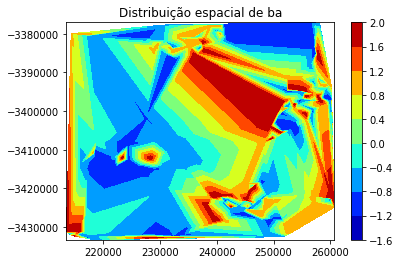

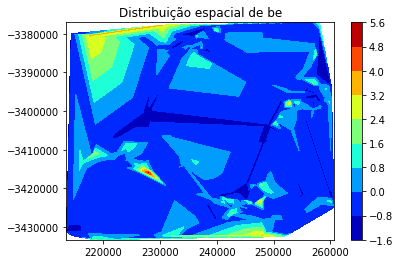

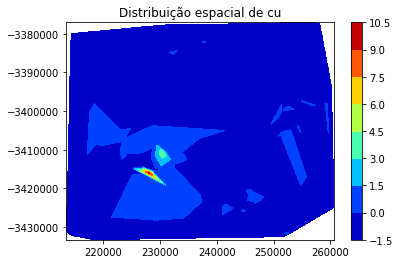

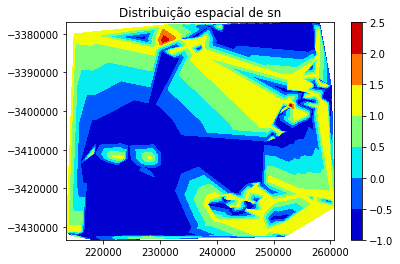

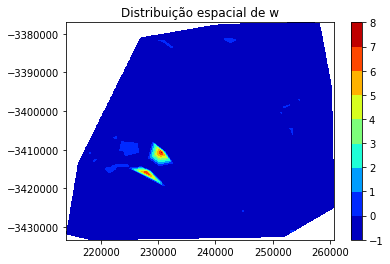

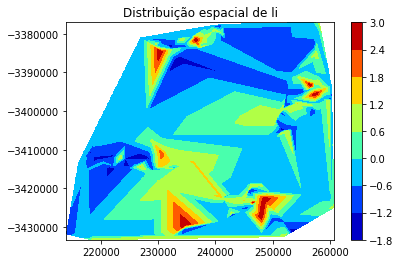

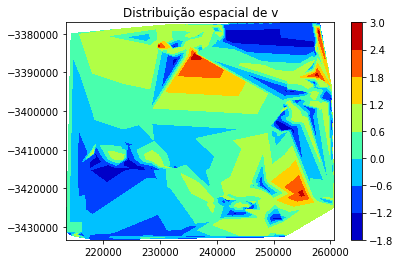

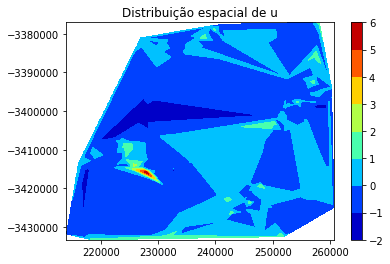

In [0]:
for c, v in enumerate (variaveis):
  sbd = bd.loc[:,['POINT_X', 'POINT_Y', v]].dropna()
  em = np.sqrt(((xmax - xmin)*(ymax - ymin)))/len(sbd[v])
  x = np.array(sbd.POINT_X.values)
  y = np.array(sbd.POINT_Y.values)
  z = np.array(sbd[v].values)
  resol = float(em)
  xinum = (max(x) - min(x)) / resol
  yinum = (max(y) - min(y)) / resol
  xi = np.linspace(min(x), max(x), xinum)
  yi = np.linspace(min(y), max(y), yinum)
  xi, yi = np.meshgrid(xi, yi)
  zi = scipy.interpolate.griddata((x, y), z, (xi, yi), method='linear')
  #Zi =  np.ma.masked_array(zi, zi < 1)
  cmap = plt.get_cmap('jet')
  c = plt.contourf(xi, yi, zi, cmap=cmap)
  plt.colorbar(c)
  plt.title(f'Distribuição espacial de {v}')
  plt.show()